# KMeans Clustering

Logan Quandt

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

In [38]:
#read in dataset and confirm it came through correctly
als_df = pd.read_csv("als_data.csv")
als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [39]:
#view all the columns
list(als_df.columns)

['ID',
 'Age_mean',
 'Albumin_max',
 'Albumin_median',
 'Albumin_min',
 'Albumin_range',
 'ALSFRS_slope',
 'ALSFRS_Total_max',
 'ALSFRS_Total_median',
 'ALSFRS_Total_min',
 'ALSFRS_Total_range',
 'ALT.SGPT._max',
 'ALT.SGPT._median',
 'ALT.SGPT._min',
 'ALT.SGPT._range',
 'AST.SGOT._max',
 'AST.SGOT._median',
 'AST.SGOT._min',
 'AST.SGOT._range',
 'Bicarbonate_max',
 'Bicarbonate_median',
 'Bicarbonate_min',
 'Bicarbonate_range',
 'Blood.Urea.Nitrogen..BUN._max',
 'Blood.Urea.Nitrogen..BUN._median',
 'Blood.Urea.Nitrogen..BUN._min',
 'Blood.Urea.Nitrogen..BUN._range',
 'bp_diastolic_max',
 'bp_diastolic_median',
 'bp_diastolic_min',
 'bp_diastolic_range',
 'bp_systolic_max',
 'bp_systolic_median',
 'bp_systolic_min',
 'bp_systolic_range',
 'Calcium_max',
 'Calcium_median',
 'Calcium_min',
 'Calcium_range',
 'Chloride_max',
 'Chloride_median',
 'Chloride_min',
 'Chloride_range',
 'Creatinine_max',
 'Creatinine_median',
 'Creatinine_min',
 'Creatinine_range',
 'Gender_mean',
 'Glucose_ma

In [40]:
#removing SubjectID and ID as they are not relevant to the patient's condition
als_df = als_df.drop(['SubjectID', 'ID'], axis=1)
als_df

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,141.0,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,143.0,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,141.0,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,139.0,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0


In [41]:
#define StandardScaler and transform data
SS = StandardScaler()
als_df_stand = SS.fit_transform(als_df)

In [42]:
#verify shape to ensure it matches DF
als_df_stand.shape

(2223, 99)

For n_clusters = 2 The average silhouette score is: 0.07878005888570402
For n_clusters = 3 The average silhouette score is: 0.0687707291658565
For n_clusters = 4 The average silhouette score is: 0.06973816142698218
For n_clusters = 5 The average silhouette score is: 0.05697679932842005
For n_clusters = 6 The average silhouette score is: 0.06477886829610223
For n_clusters = 7 The average silhouette score is: 0.05187647631845004
For n_clusters = 8 The average silhouette score is: 0.04954004349267961
For n_clusters = 9 The average silhouette score is: 0.04393719582297171
For n_clusters = 10 The average silhouette score is: 0.046121611845315456
For n_clusters = 11 The average silhouette score is: 0.04712884620554648


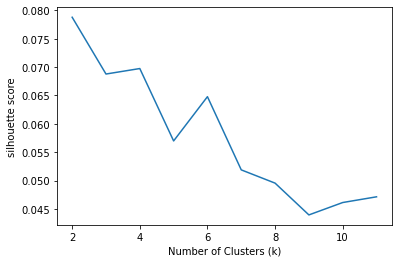

In [43]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters: #initializing a clusterer
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = clusterer.fit_predict(als_df_stand)
    
    silhouette_avg = silhouette_score(als_df_stand, cluster_labels) #calculate silhouette scores for all the samples
    print('For n_clusters =', n_clusters,
         "The average silhouette score is:", silhouette_avg)
    silhouette_avg_n_clusters.append(silhouette_avg)
    

plt.plot(range_n_clusters, silhouette_avg_n_clusters) #plot the silhouette score versus the number of clusters
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

Based on the graph and silhouette score, 2 is the optimal number of clusters.

In [44]:
#Fit a K-Means model using 2 clusters
model = KMeans(n_clusters = 2, random_state = 4)
model.fit(als_df_stand)

KMeans(n_clusters=2, random_state=4)

In [45]:
#create labels for clusters to add on to PCA dataframe
labels = model.fit_predict(als_df_stand)

In [46]:
from sklearn.decomposition import PCA
#create PCA with 2 components and fit to data
pca = PCA(n_components = 2)
als_pca = pca.fit_transform(als_df_stand)

In [47]:
#create a dataframe from the PCA transformed data
als_pca_df = pd.DataFrame(data = als_pca, columns = ['Principal Component 1', 'Principal Component 2'])

In [48]:
#create a column in the new dataframe for Clusters
als_pca_df['Cluster'] = labels

In [49]:
#view dataframe to ensure cluster column came through correctly
als_pca_df

,Principal Component 1,Principal Component 2,Cluster
0,-1.426734,-2.318912,0
1,-1.440236,-4.871468,0
2,1.617851,-0.429079,1
3,-1.919995,2.095712,0
4,0.297709,0.166916,1
...,...,...,...
2218,-4.477591,1.200755,0
2219,-0.398930,-1.876773,0
2220,-0.432887,4.245438,0
2221,-0.330784,3.317051,0


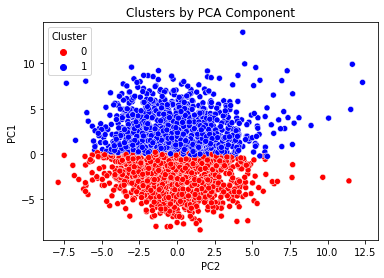

In [50]:
#create scatterplot of PCA transformed data
sns.scatterplot(x='Principal Component 2', y='Principal Component 1', data = als_pca_df, hue = als_pca_df['Cluster'], palette = ['Red', 'Blue'])
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.title("Clusters by PCA Component")
plt.show()

In [51]:
#calculate explained variance ratio
pca.explained_variance_ratio_

array([0.11330548, 0.06446616])

Conclusion

Using the Silhouette score we were able to determine that 2 was the optimal number of clusters due to it having the highest silhouette score of 0.078 even though that is not close to 1. After applying KMeans combined with PCA we have identified the two distinct groups in the data. The scatterplot shows that no datapoint appears to be out of place and the cluster 1 appears to have more outliers. From the explained variance ratio we can see that the first component contrains 11% of the variance and the second component contains 6.4% of the variance